**House Price Prediction**

*Project Goal:*
Predict the price of house by its feature.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

In [12]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [13]:
print("Train data:",train_data.shape)
print("Test data", test_data.shape)

Train data: (1460, 81)
Test data (1459, 80)


In [14]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
# Data integration
df = pd.concat([train_data,test_data])

print("Shape integrated data:", df.shape)

Shape integrated data: (2919, 81)


In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [17]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


*Getting brief information of Dataset*

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

 Most null value:
 Alley, FirePlace, PoolQC, Fence, MiscFeature

In [19]:
int_freatures = df.select_dtypes(include = ["int64"]).columns
print("Total number of integer value :", int_freatures.shape[0])
print("Names: ", int_freatures.to_list)

Total number of integer value : 26
Names:  <bound method IndexOpsMixin.tolist of Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')>


In [20]:
float_freatures = df.select_dtypes(include = ["float64"]).columns
print("Total number of integer value :", float_freatures.shape[0])
print("Names: ", float_freatures.to_list)

Total number of integer value : 12
Names:  <bound method IndexOpsMixin.tolist of Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')>


In [21]:
categorical_freatures = df.select_dtypes(include = ["object"]).columns
print("Total number of integer value :", categorical_freatures.shape[0])
print("Names: ", categorical_freatures.to_list)

Total number of integer value : 43
Names:  <bound method IndexOpsMixin.tolist of Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')>


Getting statistical Information of Numerical Features

In [22]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Handling Missing Value

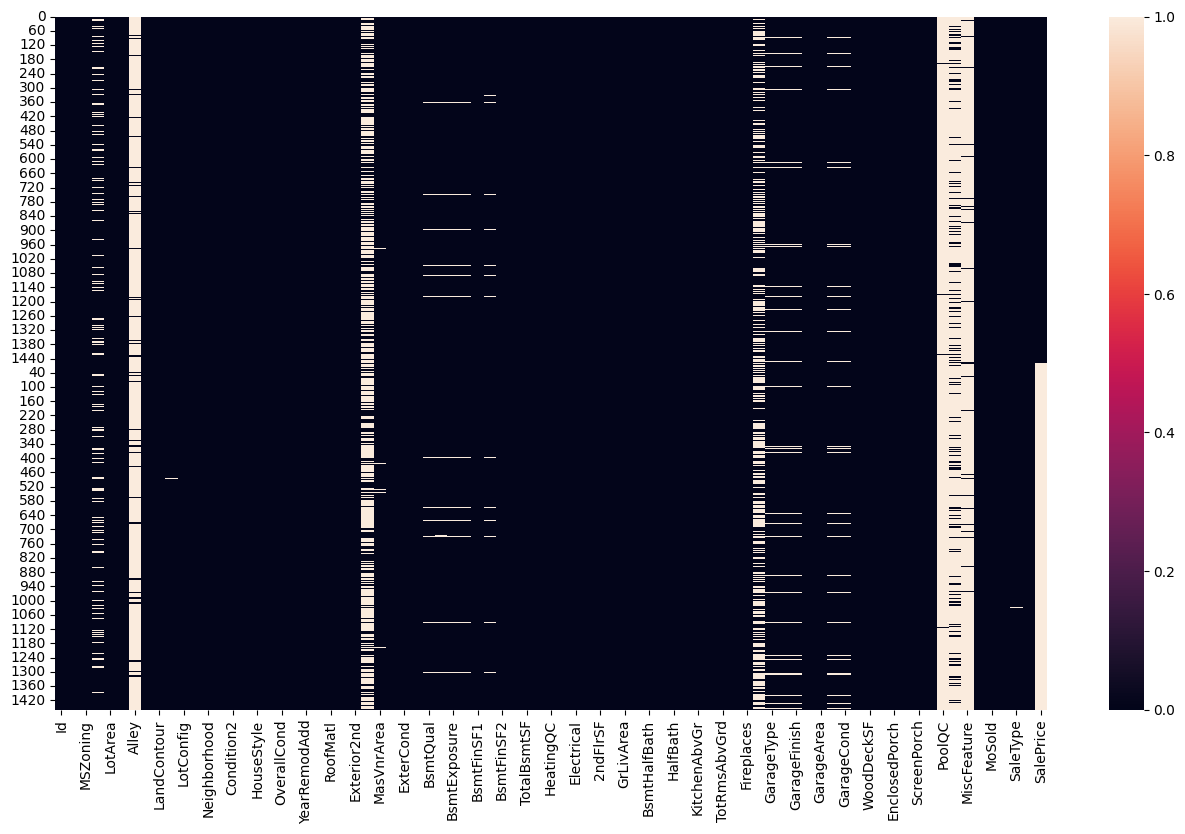

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("Eda_img/heatmap_DF_of_null_values.png")


*Get the null value percentage for every feature*


In [24]:
#set index as id column
#df = df.set_index("Id")

In [25]:
null_percent = df.isnull().sum()/ df.shape[0]* 100
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64

Drop Columns/Features: 
As per observation no feature will drop

In [26]:
#As per domain knowledge we will not drop those features, instead None value will add constant value 'NA'
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [27]:
miss_value_20_perc = null_percent[(null_percent > 20) & (null_percent < 51) ]
miss_value_20_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [28]:
miss_value_5_perc = null_percent[(null_percent > 5) & (null_percent < 21) ]
miss_value_5_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

<Axes: >

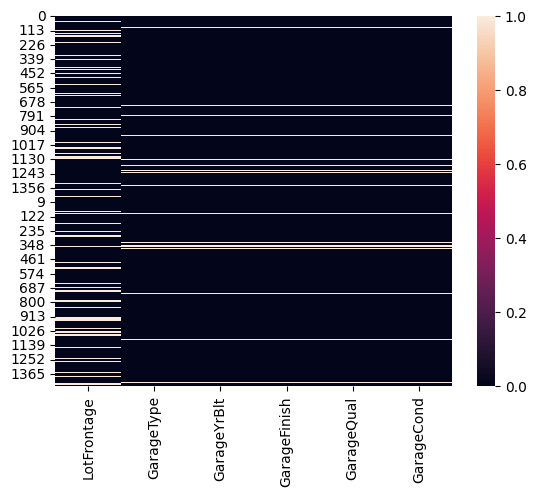

In [29]:
sns.heatmap(df[miss_value_5_perc.keys()].isnull())

Missing Value Imputation

In [30]:
missing_value_feat = null_percent[null_percent > 0]
print("Total missing value features= ", len(missing_value_feat))
missing_value_feat

Total missing value features=  35


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [31]:
cat_NA_feat = missing_value_feat[missing_value_feat.keys().isin(categorical_freatures)]
print("Total num of categorical missing features : ", len(cat_NA_feat))
cat_NA_feat

Total num of categorical missing features :  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [32]:
float_NA_feat = missing_value_feat[missing_value_feat.keys().isin(float_freatures)]
print("Total num of categorical missing features : ", len(float_NA_feat))
float_NA_feat

Total num of categorical missing features :  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [33]:
int_NA_feat = missing_value_feat[missing_value_feat.keys().isin(int_freatures)]
print("Total num of categorical missing features : ", len(int_NA_feat))
int_NA_feat

Total num of categorical missing features :  0


Series([], dtype: float64)

Handling MSZoning = 0.137033

In [34]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

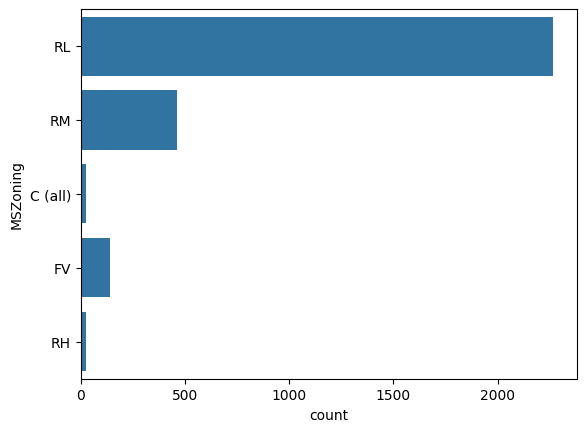

In [35]:
sns.countplot(df["MSZoning"])

In [36]:
df_mvi = df.copy()
df_mvi.shape

(2919, 81)

In [37]:
mszoning_mode = df['MSZoning'].mode()[0]
df_mvi["MSZoning"].replace(np.nan,mszoning_mode, inplace= True)
df_mvi['MSZoning'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\3520154769.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan,mszoning_mode, inplace= True)


np.int64(0)

In [38]:
# HANDLING ALLEY
df_mvi['Alley'].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [39]:
alley_count = 'NA'
df_mvi['Alley'].replace(np.nan,alley_count, inplace= True)
df_mvi['Alley'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\2206494933.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Alley'].replace(np.nan,alley_count, inplace= True)


np.int64(0)

In [40]:
#HANDLING LotFrontage = 16.649538
lotfrontage_mean = df['LotFrontage'].mean()
df_mvi['LotFrontage'].replace(np.nan,lotfrontage_mean, inplace= True)
df_mvi['LotFrontage'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\4085775476.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['LotFrontage'].replace(np.nan,lotfrontage_mean, inplace= True)


np.int64(0)

In [41]:
# Handling Utilities = 0.068517
df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [42]:
utilities_mode = df['Utilities'].mode()[0]
df_mvi['Utilities'].replace(np.nan, utilities_mode, inplace = True)
df_mvi['Utilities'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\111309800.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Utilities'].replace(np.nan, utilities_mode, inplace = True)


np.int64(0)

In [43]:
#Handeling Exterior1st = 0.034258 & Exterior2nd = 0.034258
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [44]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [45]:
exterior1st_mode = df['Exterior1st'].mode()[0]
df_mvi['Exterior1st'].replace(np.nan, exterior1st_mode, inplace = True)

exterior2nd_mode = df['Exterior2nd'].mode()[0]
df_mvi['Exterior2nd'].replace(np.nan, exterior2nd_mode, inplace = True)

print("E1st is null :",df_mvi['Exterior1st'].isnull().sum())
print("E2nd is null :",df_mvi['Exterior2nd'].isnull().sum())

E1st is null : 0
E2nd is null : 0


C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\2033265494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Exterior1st'].replace(np.nan, exterior1st_mode, inplace = True)
C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\2033265494.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

Handling MasVnrType = 60.500171 & MasVnrArea = 0.787941

In [46]:
masvnrtype_mode = df['MasVnrType'].mode()[0]
df_mvi['MasVnrType'].replace(np.nan, masvnrtype_mode, inplace = True)
df_mvi['MasVnrType'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\2868818938.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrType'].replace(np.nan, masvnrtype_mode, inplace = True)


np.int64(0)

In [47]:
masvnrarea_cnst = 0
df_mvi['MasVnrArea'].replace(np.nan, masvnrarea_cnst, inplace = True)
df_mvi['MasVnrArea'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\3365676094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrArea'].replace(np.nan, masvnrarea_cnst, inplace = True)


np.int64(0)

 Handeling Bsmt Feature 

In [48]:
num_bsmt_feat = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF" ,"TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]

cat_bsmt_feat = ["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1","BsmtFinType2"]

<Axes: >

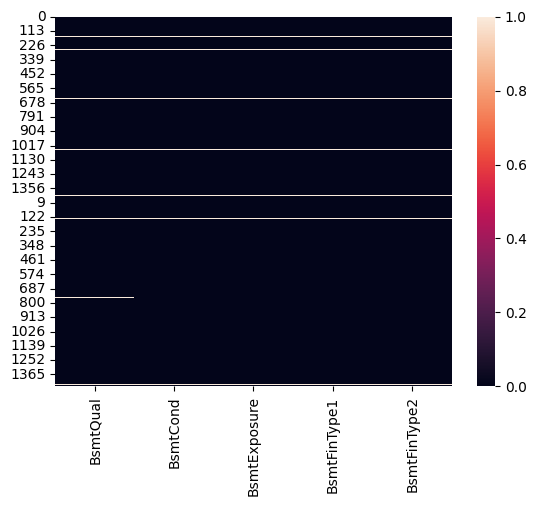

In [49]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [50]:
for feat in cat_bsmt_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [51]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace = True)

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\2065120219.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_cont, inplace = True)


In [52]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: >

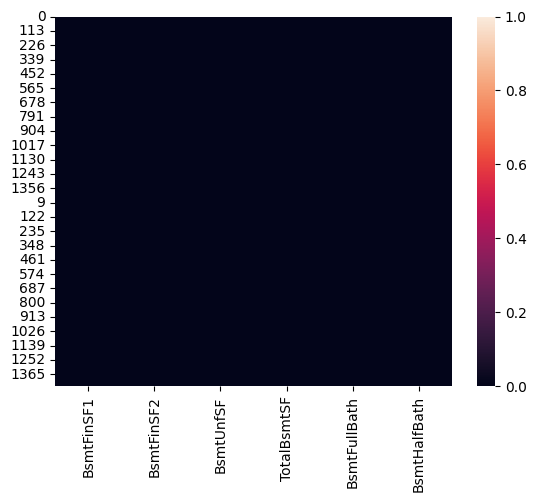

In [53]:
sns.heatmap(df[num_bsmt_feat].isnull())


In [54]:
bst_num = 0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan, bst_num, inplace=True)

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\3412562979.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bst_num, inplace=True)


In [55]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

Handeling Electrical and KitchenQual

In [56]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [57]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [58]:
df_ekk = df[["Electrical", "KitchenQual","KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis = 1)]

,Electrical,KitchenQual,KitchenAbvGr
1379,NaN,Gd,1
95,SBrkr,NaN,1


In [59]:
electrical_mode = df['Electrical'].mode()[0]
df_mvi['Electrical'].replace(np.nan, electrical_mode, inplace = True)
df_mvi['Electrical'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\953439067.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Electrical'].replace(np.nan, electrical_mode, inplace = True)


np.int64(0)

In [60]:
kitchenQual_mode = df['KitchenQual'].mode()[0]
df_mvi['KitchenQual'].replace(np.nan, kitchenQual_mode, inplace = True)
df_mvi['KitchenQual'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\1323879347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['KitchenQual'].replace(np.nan, kitchenQual_mode, inplace = True)


np.int64(0)

Handling Remaning Cat Features

In [61]:
functional_mode = df['Functional'].mode()[0]
df_mvi['Functional'].replace(np.nan, functional_mode, inplace = True)
df_mvi['Functional'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\4076238356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Functional'].replace(np.nan, functional_mode, inplace = True)


np.int64(0)

In [62]:
saletype_mode = df['SaleType'].mode()[0]
df_mvi['SaleType'].replace(np.nan, saletype_mode, inplace = True)
df_mvi['SaleType'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\3118584820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['SaleType'].replace(np.nan, saletype_mode, inplace = True)


np.int64(0)

In [63]:
other_cat_feat = ["FireplaceQu", "PoolQC","Fence","MiscFeature"]

for feat in other_cat_feat:
    print(f"Value count of {feat}: {df[feat].value_counts()}")

Value count of FireplaceQu: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value count of PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value count of Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value count of MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [64]:
fireplaceQu_count = 'NA'
df_mvi['FireplaceQu'].replace(np.nan, fireplaceQu_count, inplace = True)
df_mvi['FireplaceQu'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\2101882635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['FireplaceQu'].replace(np.nan, fireplaceQu_count, inplace = True)


np.int64(0)

In [65]:
poolqc_count = 'NA'
df_mvi['PoolQC'].replace(np.nan, poolqc_count, inplace = True)
df_mvi['PoolQC'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\1113472001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['PoolQC'].replace(np.nan, poolqc_count, inplace = True)


np.int64(0)

In [66]:
fence_count = 'NA'
df_mvi['Fence'].replace(np.nan, fence_count, inplace = True)
df_mvi['Fence'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\2851088074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Fence'].replace(np.nan, fence_count, inplace = True)


np.int64(0)

In [67]:
miscfeature_count = 'NA'
df_mvi['MiscFeature'].replace(np.nan, miscfeature_count, inplace = True)
df_mvi['MiscFeature'].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\3565879405.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MiscFeature'].replace(np.nan, miscfeature_count, inplace = True)


np.int64(0)

In [68]:
cat_garage_feat = ['GarageType','GarageFinish','GarageQual','GarageCond']
num_garage_feat = ['GarageYrBlt','GarageCars',"GarageArea"]

df_garage = df[num_garage_feat + cat_garage_feat]
df_garage[df_garage.isnull().any(axis = 1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,0.0,0.0,NaN,NaN,NaN,NaN
48,NaN,0.0,0.0,NaN,NaN,NaN,NaN
78,NaN,0.0,0.0,NaN,NaN,NaN,NaN
88,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1433,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1449,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1453,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1454,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [69]:
garage_cont = 'NA'
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,garage_cont,inplace = True)

df_mvi[cat_garage_feat].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\3646276213.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,garage_cont,inplace = True)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [70]:
garage_num = 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan,garage_num,inplace = True)

df_mvi[num_garage_feat].isnull().sum()

C:\Users\Sanchay-Sinha\AppData\Local\Temp\ipykernel_13252\3332651849.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,garage_num,inplace = True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [71]:
df_mvi.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

## Feature Transformation
### Convert Numerical Feature to Categorical Feature

In [72]:
feat_for_num_conv = ['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
for feat in feat_for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [73]:
df_mvi[feat_for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,2003,2003,2003.0,2,2008
1,20,1976,1976,1976.0,5,2007
2,60,2001,2002,2001.0,9,2008
3,70,1915,1970,1998.0,2,2006
4,60,2000,2000,2000.0,12,2008


In [74]:

df_mvi['MoSold'] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])

In [75]:
for feat in feat_for_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [76]:
for feat in feat_for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
GarageYrBlt: data type = object
MoSold: data type = object
YrSold: data type = object


In [77]:

df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [78]:
df['BsmtCond'].unique()

array([ 3,  4, -1,  2,  1], dtype=int8)

In [79]:
df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes

In [80]:
df['BsmtExposure'].unique()

array([-1,  3,  1,  2], dtype=int8)

In [81]:
df['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [82]:
df['Utilities'].unique()

array([ 3, -1], dtype=int8)

### One Hot Encoding for Nominal Categorical Data

In [83]:
df_encod = df_mvi.copy()

obj_feat = df_encod.select_dtypes(include='object').columns.to_list()
print("Total object data type feature : ", len(obj_feat))
print("Features: \n", obj_feat)

Total object data type feature :  49
Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [84]:
df_encod = pd.get_dummies(df_encod, columns = obj_feat, prefix= obj_feat, drop_first=True)

In [85]:
df_encod.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,196.0,706.0,0.0,150.0,856.0,...,False,False,False,False,True,False,False,False,True,False
1,2,80.0,9600,6,8,0.0,978.0,0.0,284.0,1262.0,...,False,False,False,False,True,False,False,False,True,False
2,3,68.0,11250,7,5,162.0,486.0,0.0,434.0,920.0,...,False,False,False,False,True,False,False,False,True,False
3,4,60.0,9550,7,5,0.0,216.0,0.0,540.0,756.0,...,False,False,False,False,True,False,False,False,False,False
4,5,84.0,14260,8,5,350.0,655.0,0.0,490.0,1145.0,...,False,False,False,False,True,False,False,False,True,False


## Split Data for Training and Testing

In [86]:
df_encod.shape

(2919, 564)

In [87]:
X_train = df_encod[:train_data.shape[0]].drop("SalePrice", axis = 1)
y_train = df_encod["SalePrice"][:train_data.shape[0]]

X_test = df_encod[train_data.shape[0]:].drop("SalePrice", axis = 1)

print(X_train.shape,'\n', y_train.shape,'\n', X_test)

(1460, 563) 
 (1460,) 
         Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0     1461         80.0    11622            5            6         0.0   
1     1462         81.0    14267            6            6       108.0   
2     1463         74.0    13830            5            5         0.0   
3     1464         78.0     9978            6            6        20.0   
4     1465         43.0     5005            8            5         0.0   
...    ...          ...      ...          ...          ...         ...   
1454  2915         21.0     1936            4            7         0.0   
1455  2916         21.0     1894            4            5         0.0   
1456  2917        160.0    20000            5            7         0.0   
1457  2918         62.0    10441            5            5         0.0   
1458  2919         74.0     9627            7            5        94.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0         

## Feature Scaling

In [88]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Train ML Model

In [89]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


In [90]:
# Instantiate the models
lr = LinearRegression()
svr = SVR()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()

In [91]:
# Create the dictionary
models = {
    "a": ["LinearRegression", lr],
    "b": ["SVR", svr],
    "c": ["SGDRegressor", sgdr],
    "d": ["KNeighborsRegressor", knr],
    "e": ["GaussianProcessRegressor", gpr],
    "f": ["DecisionTreeRegressor", dtr],
    "g": ["GradientBoostingRegressor", gbr],
    "h": ["RandomForestRegressor", rfr]
}


In [92]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train, y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = r2_val_score.mean()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    return score, y_pred
    




In [93]:
models_score = []
for model_key, model_info in models.items():
    print("Training Model:", model_info[0])
    score = test_model(model_info[1], X_train, y_train)
    print("Score of model:", score)
    models_score.append([model_info[0], score])

Training Model: LinearRegression
Score of model: (np.float64(-7.027283862047028e+23), array([106581.1083328 , 160641.03474788, 182411.47056067, ...,
       197027.96707019, 114835.54069007, 229992.09728499]))
Training Model: SVR
Score of model: (np.float64(-0.052118488726017036), array([162999.72541761, 162997.01241118, 163048.18222714, ...,
       163025.85433039, 163003.31853993, 163040.1139001 ]))
Training Model: SGDRegressor
Score of model: (np.float64(-5311.2803730308515), array([ -936418.6628597 ,  4033664.16285762,   179363.15144444, ...,
       -2223435.08700481,  2895181.27033237,  -663039.42071809]))
Training Model: KNeighborsRegressor
Score of model: (np.float64(0.5689529379250781), array([124510., 144580., 227680., ..., 165630., 153880., 201520.]))
Training Model: GaussianProcessRegressor
Score of model: (np.float64(-5.403633412382561), array([2.44993421e-057, 6.41022339e-135, 6.91152146e-016, ...,
       2.36745966e-083, 1.69975045e-102, 9.91815634e-038]))
Training Model: 

### Hyperparameter Tuning For GradientBoostingRegressor


In [94]:
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor()

param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=7, scoring='r2', n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)

print("Best parameters for GradientBoostingRegressor:", grid_search_gbr.best_params_)
print("Best score for GradientBoostingRegressor:", grid_search_gbr.best_score_)


Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score for GradientBoostingRegressor: 0.8913711484004638


## Model Save

In [96]:
import joblib

gbr_model = grid_search_gbr.best_estimator_

joblib.dump(gbr_model, 'gradient_boosting_regressor.pkl')

print("GradientBoostingRegressor model saved as 'gradient_boosting_regressor.pkl'")


GradientBoostingRegressor model saved as 'gradient_boosting_regressor.pkl'
